<a href="https://colab.research.google.com/github/javierhrdez/Algoritmos-Optimizacion/blob/main/Tarea_4_Javier_Herna%CC%81ndez_Ca%CC%81rdenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 4: Visualización espacio-temporal validada con modelo de Munzner.


## Javier Hernández Cárdenas (jhernandezc10@estudiante.uc.cl)

In [87]:
# Instalación de librerías adicionales requeridas
!pip install wikipedia wordcloud

In [88]:
#cargar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import wikipedia
import wordcloud
import seaborn as sns

In [89]:
#cargar dataset
df = pd.read_csv("winequality-red-Tarea-final.csv")

In [90]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [91]:
#etiquetar vinos buenos y malos
df["quality_tag"] = np.where(df["quality"]>5,"ALTA", "BAJA")

## a.	Un histograma para comparar una columna.

Columna Utilizada : **alcohol**

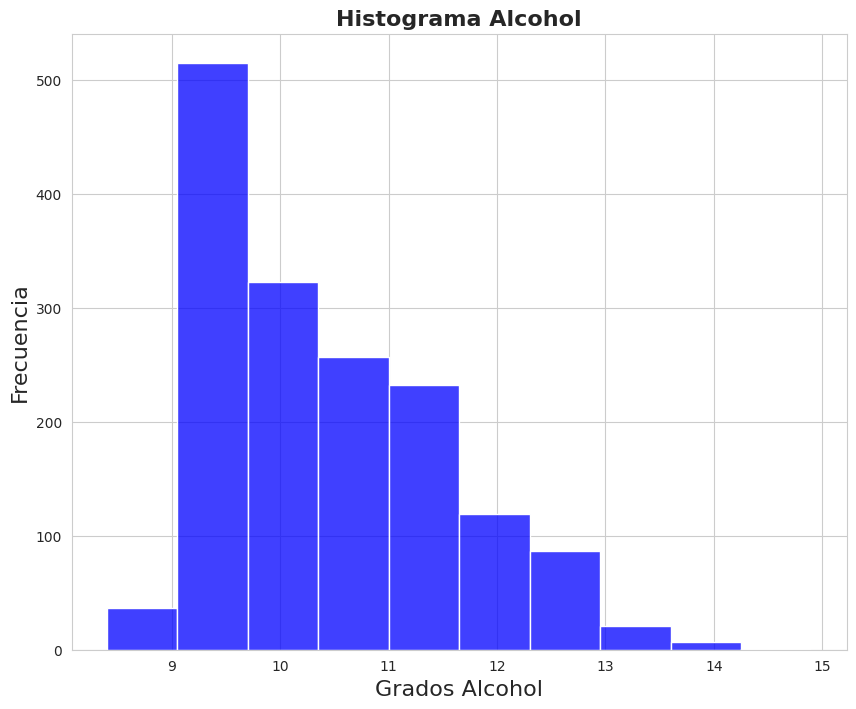

In [92]:
plt.figure(figsize=(10, 8))
fig = sns.histplot(df['alcohol'], bins=10, color='blue')
fig.set_xlabel("Grados Alcohol",fontsize=16);
fig.set_ylabel("Frecuencia",fontsize=16);
fig.set_title("Histograma Alcohol", fontsize=16, fontweight='bold');

## b.	Un gráfico de burbujas para comparar 4 columnas.

Columnas utilizadas : **pH**, **alcohol**, **sulphates**, **fixed acidity**

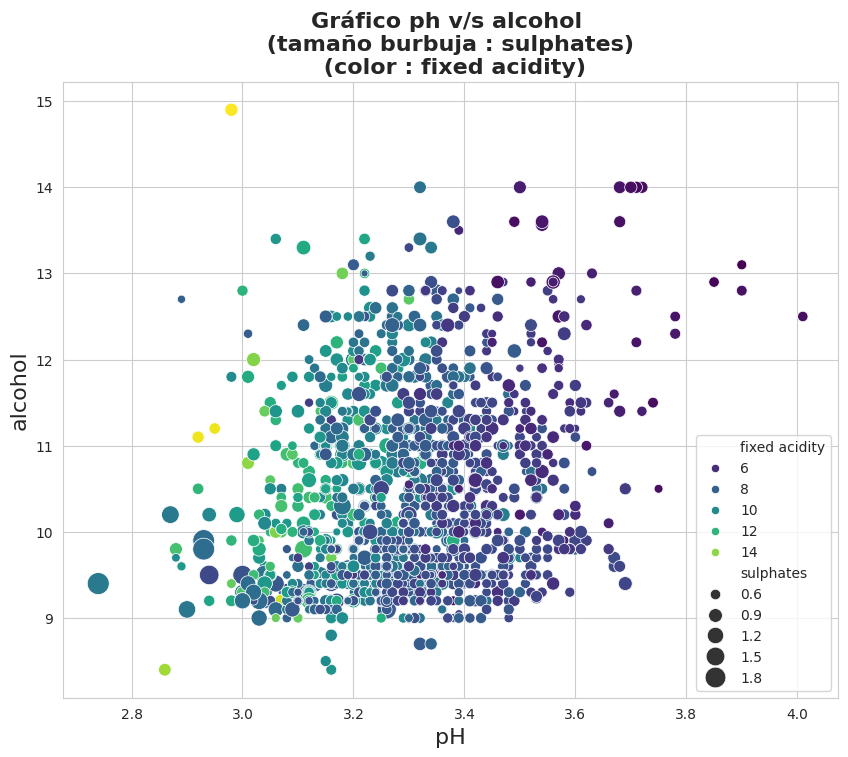

In [93]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=df, x='pH', y='alcohol', size='sulphates', hue='fixed acidity', palette='viridis', sizes=(20, 250))
fig.set_xlabel("pH",fontsize=16);
fig.set_ylabel("alcohol",fontsize=16);
fig.set_title("Gráfico ph v/s alcohol \n (tamaño burbuja : sulphates) \n (color : fixed acidity)", fontsize=16, fontweight='bold');


## c.	Un gráfico de dispersión para 2 columnas.

Columnas utilizadas : **alcohol**, **volatile acidity**

Separación : **quality_tag** (BAJA, ALTA)

Text(0.5, 1.0, 'Alcohol v/s Volatile Acidity')

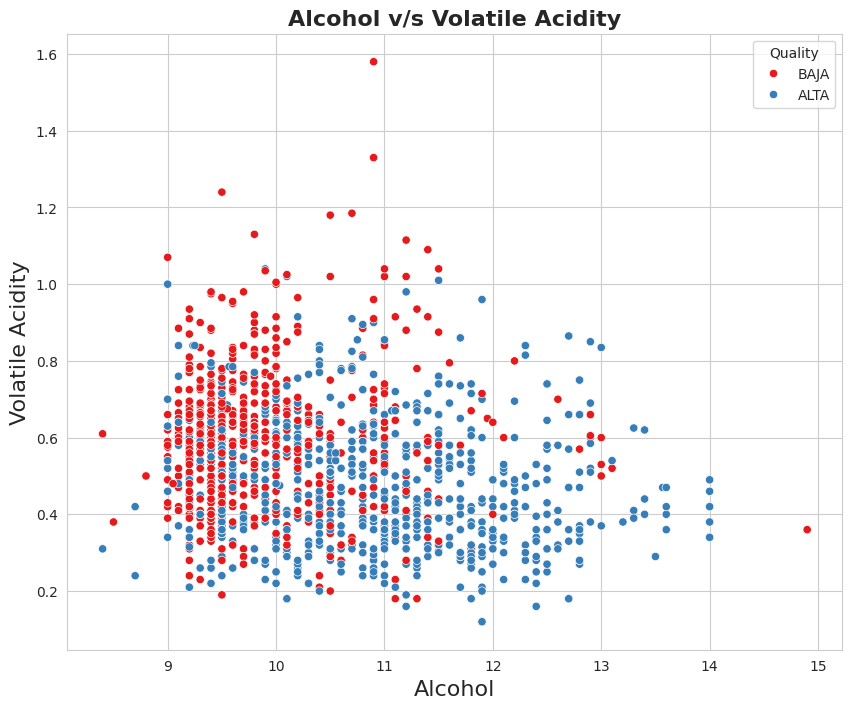

In [94]:
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data = df, x = "alcohol", y = "volatile acidity", hue = "quality_tag", palette='Set1')
handles, labels = fig.get_legend_handles_labels()
new_labels = ["BAJA", "ALTA"]
fig.legend(handles, new_labels, title = "Quality")
fig.set_xlabel("Alcohol",fontsize=16);
fig.set_ylabel("Volatile Acidity",fontsize=16);
fig.set_title("Alcohol v/s Volatile Acidity", fontsize=16, fontweight='bold')

## d.	Una matriz de gráficos de dispersión para comparar un conjunto de 4

Columnas utilizadas : **alcohol**, **volatile acidity**, **total sulfur dioxide**, **sulphates**, **quality_tag**

Separación : **quality_tag** (BAJA, ALTA)

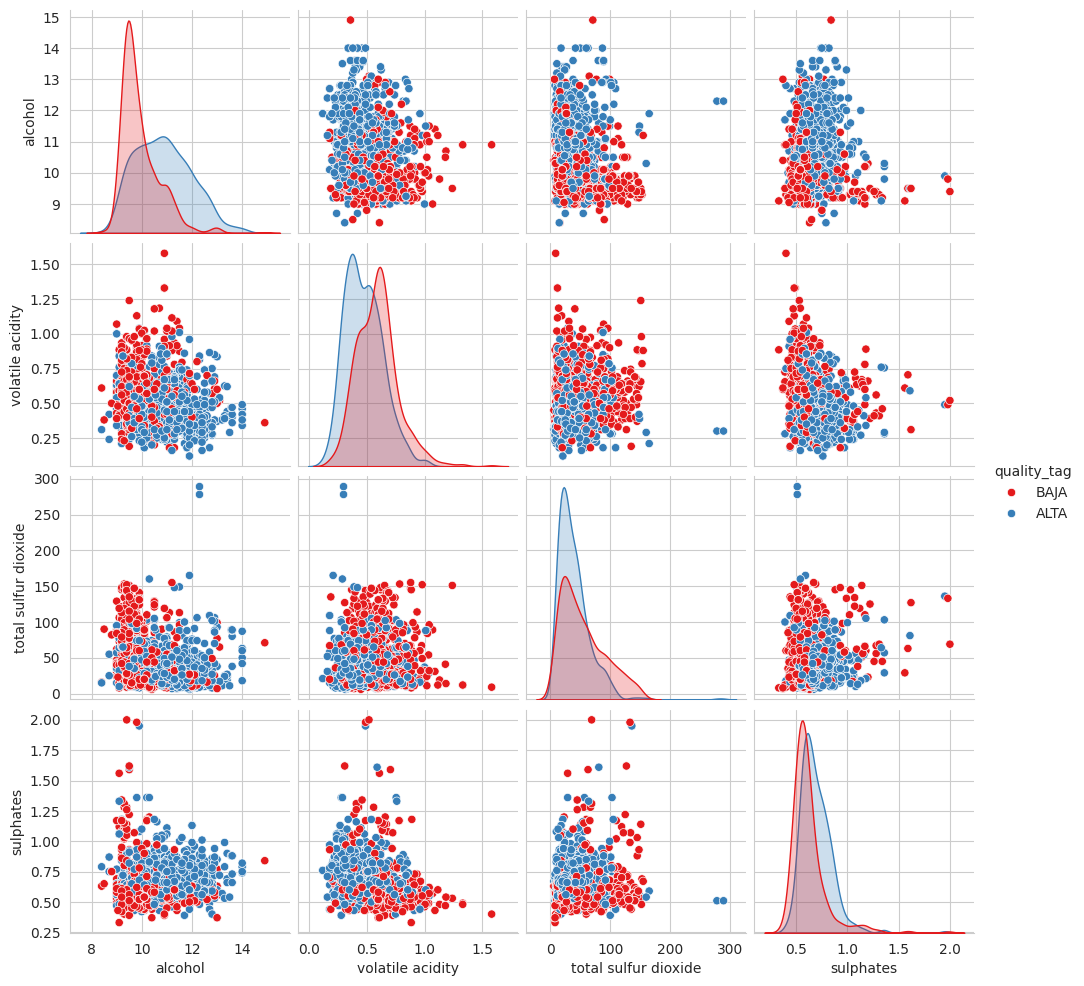

In [95]:
fig = sns.pairplot(df[['alcohol', 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'quality_tag']], hue='quality_tag', palette = "Set1")
plt.show()

## e.	Un gráfico de densidad para una columna, que separe los datos en vinos de buena calidad (calidad sobre 5) de mala calidad (bajo 5).

Columnas utilizadas : **alcohol**

Separación : **quality_tag** (BAJA, ALTA)

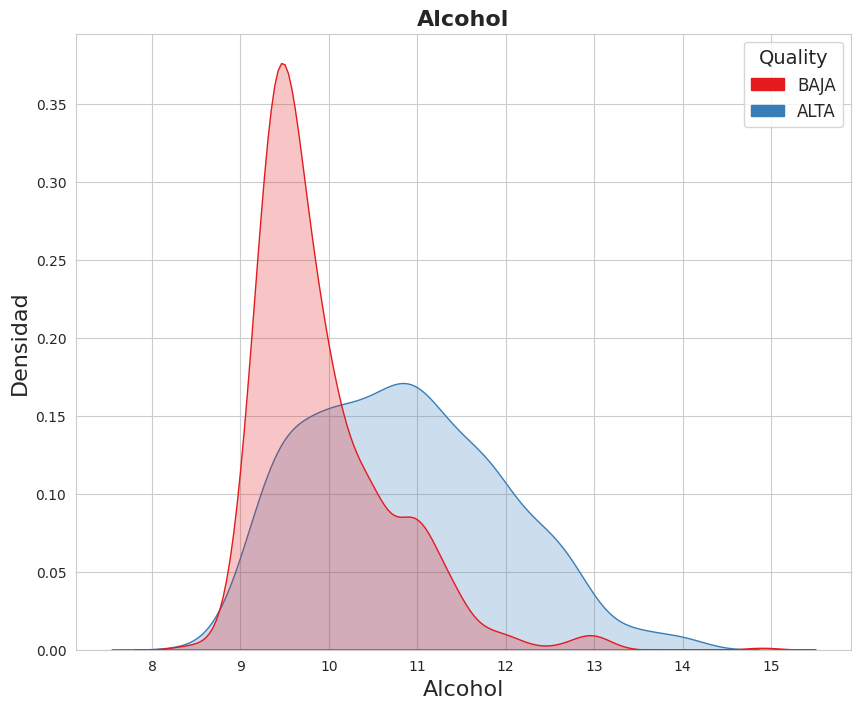

In [96]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.kdeplot(data=df, x='alcohol', hue='quality_tag', fill=True, palette="Set1", ax=ax, legend=False)
from matplotlib.patches import Patch
colors = sns.color_palette("Set1", 2)
new_labels = ["BAJA", "ALTA"]
handles = [Patch(color=colors[i], label=new_labels[i]) for i in range(2)]
ax.legend(handles=handles, title="Quality", fontsize=12, title_fontsize=14)
ax.set_xlabel("Alcohol", fontsize=16)
ax.set_ylabel("Densidad", fontsize=16)
ax.set_title("Alcohol", fontsize=16, fontweight='bold')
plt.show()


## f.	Un gráfico de torta que muestre la cantidad de vinos de cada calidad.

Columna utilizada : **quality**

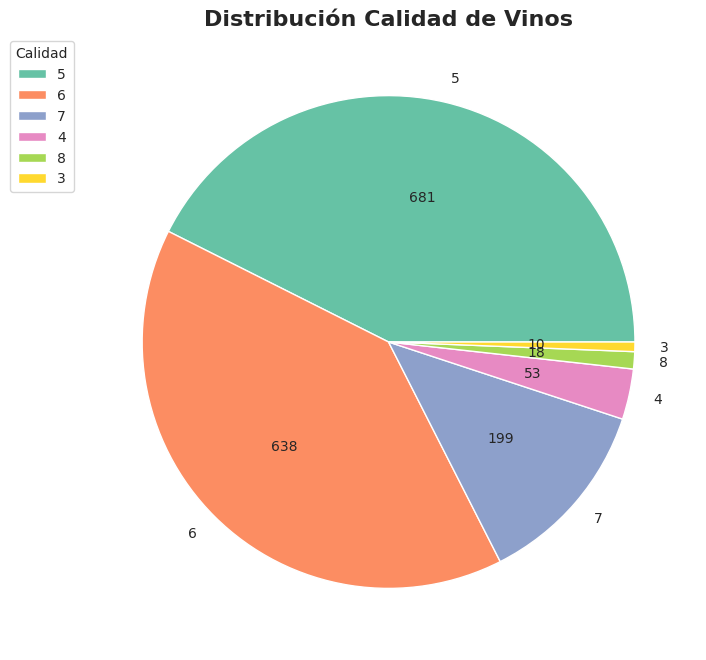

In [97]:
counting = df["quality"].value_counts()

seaborn_palette = sns.color_palette('Set2', n_colors=len(counting))  # Puedes cambiar 'Set2' por cualquier otra paleta
fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot()
pie_plot = plot.pie(counting, labels = counting.index, autopct = lambda x: "{:.0f}".format(x * (counting.sum() / 100)), colors=seaborn_palette )
intervalos = df["quality"].unique()
plot.legend(pie_plot[0], intervalos, title = "Calidad", bbox_to_anchor = (0, 1));
plot.set_title("Distribución Calidad de Vinos", fontsize=16, fontweight='bold');

## g.	Un small múltiples de histogramas, separados por calidad.

Columnas utilizadas : **alcohol**,**quality**


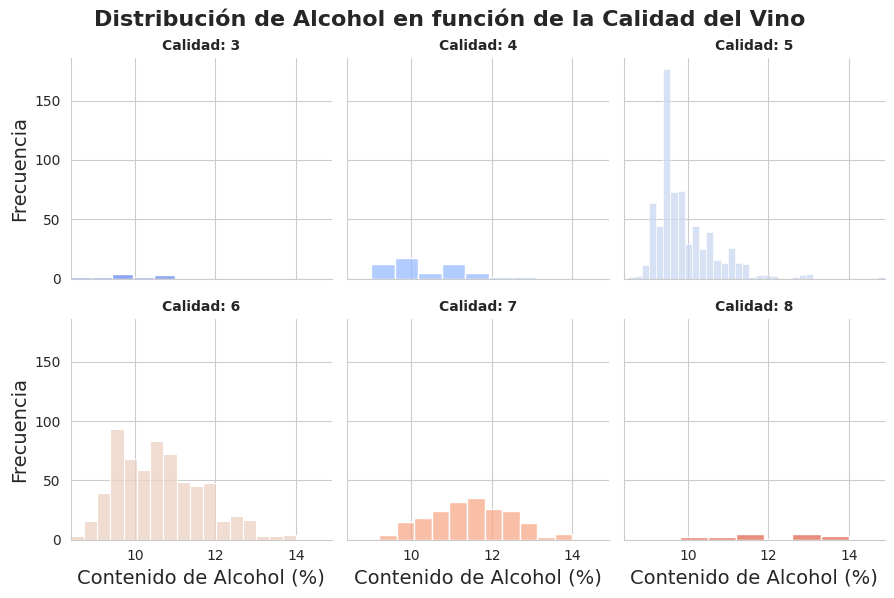

In [98]:
color_palette = sns.color_palette("coolwarm", as_cmap=False)
grid = sns.FacetGrid(data=df, col="quality", hue="quality", col_wrap=3, palette=color_palette)
grid.map(sns.histplot, "alcohol")
grid.set_axis_labels("Contenido de Alcohol (%)", "Frecuencia", fontsize=14)
grid.set_titles(col_template="Calidad: {col_name}", fontsize=14, weight='bold')
grid.set(xlim=(df["alcohol"].min(), df["alcohol"].max()), ylim=(0, None))
plt.subplots_adjust(top=0.9)
grid.fig.suptitle("Distribución de Alcohol en función de la Calidad del Vino", fontsize=16, fontweight='bold');

## h.	Un gráfico de violín donde se separe una columna en cuartiles y se grafique esta separación junto con la separación de vinos de buena y mala calidad (gráfico de violín con dos variables categóricas).

Columnas utilizadas : **alcohol**, **pH**

Separación : **quality_tag** (BAJA, ALTA)

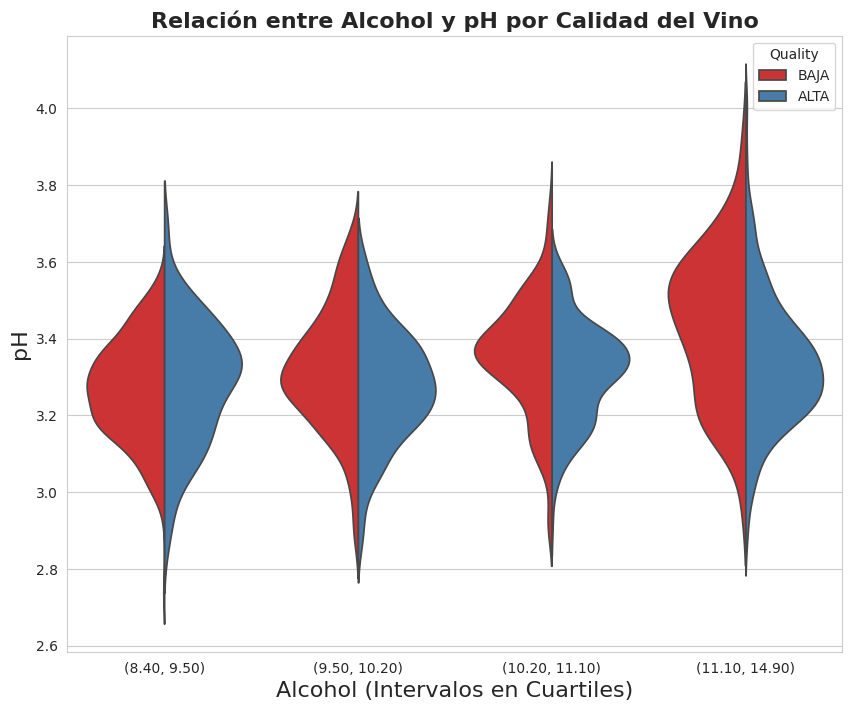

In [99]:
intervalos = pd.qcut(df['alcohol'], 4)
intervalos_formateados = intervalos.astype(str).apply(lambda x: f"({float(x.split(',')[0][1:]):.2f}, {float(x.split(',')[1][:-1]):.2f})")
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(data=df, x=intervalos_formateados, y='pH', hue='quality_tag',
               palette="Set1", split=True, ax=ax, density_norm='width', inner=None)
handles, labels = ax.get_legend_handles_labels()
new_labels = ["BAJA", "ALTA"]
ax.legend(handles, new_labels, title="Quality", loc='upper right')
ax.set_xlabel("Alcohol (Intervalos en Cuartiles)", fontsize=16)
ax.set_ylabel("pH", fontsize=16)
ax.set_title("Relación entre Alcohol y pH por Calidad del Vino", fontsize=16, fontweight='bold');


## WordCloud

In [100]:
page = wikipedia.page("Chile", auto_suggest=False)
content = page.content

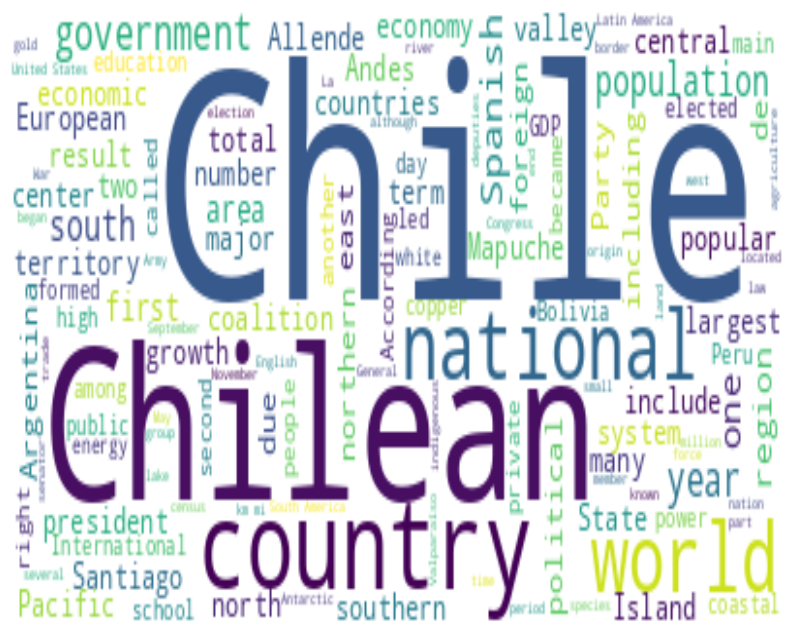

In [101]:
stopwords = set(wordcloud.STOPWORDS)
wc = wordcloud.WordCloud(background_color='white', max_words=200,
                stopwords= stopwords)
wc.generate(content)
plt.rcParams["figure.figsize"] = [10, 8]
plt.imshow(wc, interpolation='bilinear', aspect='auto')
plt.axis('off')
plt.show()

In [102]:
page = wikipedia.page("México", auto_suggest=False)
content = page.content

image = Image.open('mexico.jpg')
mask = np.array(image)

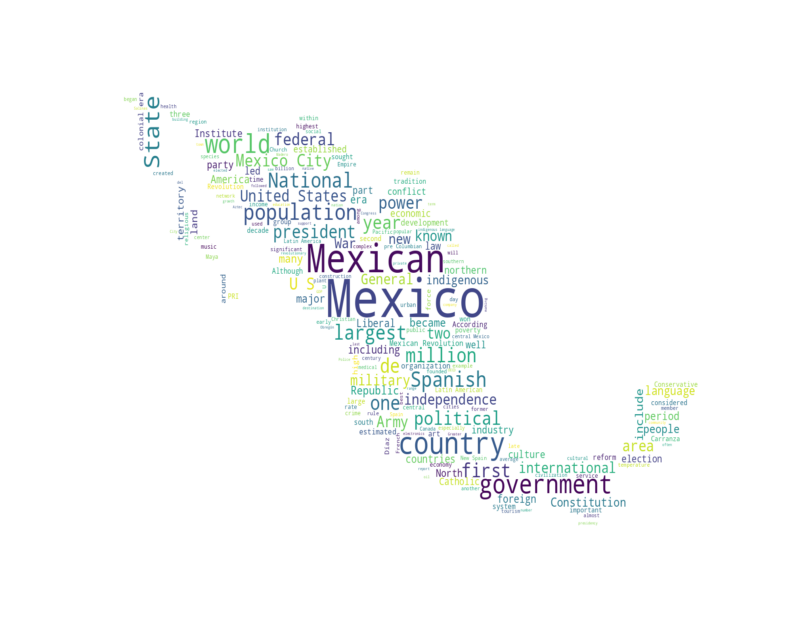

In [103]:
stopwords = set(wordcloud.STOPWORDS)
wc = wordcloud.WordCloud(background_color='white', max_words=200, mask = mask,
                stopwords= stopwords)
wc.generate(content)
plt.rcParams["figure.figsize"] = [10, 8]
plt.imshow(wc, interpolation='bilinear', aspect='auto')
plt.axis('off')
plt.show()